In [28]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3_with_gdp.csv')

male = df[df["Sex"] == "M"]
female = df[df["Sex"] == "F"]

used_columns = ["Height", "BMI", "Age", "GDP"]

In [29]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = used_columns

scaler = StandardScaler()

male.loc[:, columns_to_normalize] = scaler.fit_transform(male[columns_to_normalize])
female.loc[:, columns_to_normalize] = scaler.fit_transform(female[columns_to_normalize])


In [30]:
male.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
0,1,A Dijiang,M,-0.310308,0.082423,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,0.411938,-0.723040
1,2,A Lamusi,M,-0.491935,-0.917010,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,-0.942025,-0.398896
2,12,Jyri Tapani Aalto,M,0.961077,-0.717123,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,0.057120,0.586809
5,18,Timo Antero Aaltonen,M,0.961077,0.981913,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,No Medal,False,4.443327,0.586809
7,23,Fritz Aanes,M,-0.673561,0.782026,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No Medal,False,0.673682,1.342383


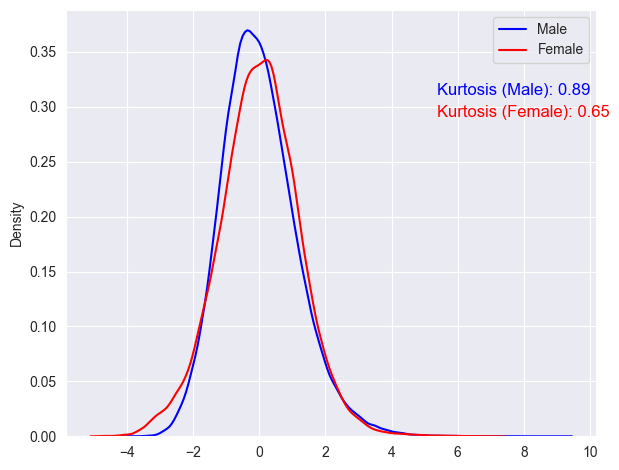

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import kurtosis

pca = PCA(n_components=1)
pca_male = pca.fit_transform(male[used_columns])
pca_female = pca.fit_transform(female[used_columns])

# Calculate kurtosis for male and female PCA results
kurt_male = kurtosis(pca_male.squeeze())
kurt_female = kurtosis(pca_female.squeeze())

# Create the plot
fig, ax = plt.subplots()
sns.kdeplot(data=pca_male.squeeze(), ax=ax, label='Male', color='blue')
sns.kdeplot(data=pca_female.squeeze(), ax=ax, label='Female', color='red')

# Add kurtosis annotations
ax.annotate(f'Kurtosis (Male): {kurt_male:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
ax.annotate(f'Kurtosis (Female): {kurt_female:.2f}', xy=(0.7, 0.75), xycoords='axes fraction', fontsize=12, color='red')

# Add legend and show plot
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Initialize a list to store results
results = []

unique_events = male['Event'].unique()
for event in unique_events:  
    male_event = male[male['Event'] == event][used_columns]

    pca_male = PCA(n_components=1).fit_transform(male_event)

    # Calculate kurtosis for both male and female PCA results
    kurt_male = kurtosis(pca_male.squeeze())

    # Append results
    results.append({
        'Event': event,
        'Kurtosis Male': kurt_male,
        'PCA': pca_male
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by kurtosis (you can choose to sort by either male or female kurtosis)
sorted_results = results_df.sort_values(by='Kurtosis Male', ascending=False)

# Display sorted results
sorted_results.reset_index(drop=True, inplace=True)
print(sorted_results)


                                     Event  Kurtosis Male  \
0     Canoeing Men's Kayak Singles, Slalom      19.010054   
1             Judo Men's Half-Middleweight      18.816195   
2       Athletics Men's 400 metres Hurdles      15.298088   
3     Wrestling Men's Flyweight, Freestyle      14.470729   
4               Boxing Men's Featherweight      14.017975   
..                                     ...            ...   
218               Rowing Men's Coxed Pairs      -1.123295   
219          Trampolining Men's Individual      -1.242372   
220     Diving Men's Synchronized Platform      -1.252806   
221  Diving Men's Synchronized Springboard      -1.365816   
222        Rugby Sevens Men's Rugby Sevens      -1.436855   

                                                   PCA  
0    [[-0.44581866360499767], [-1.0873526969613632]...  
1    [[-0.6414629507941745], [-0.7645442620660751],...  
2    [[-0.1855792063824252], [0.2794108400395938], ...  
3    [[-0.4381869846529032], [-0.267867

In [39]:
kayak = male[male["Event"] == "Canoeing Men's Kayak Singles, Slalom"]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
537,538,Jernej Abrami,M,0.961077,-0.417293,70.0,Slovenia,SVN,1996 Summer,1996,Summer,Atlanta,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.219968,-0.152295
911,879,Corran Descy Addison,M,-0.491935,-0.917010,65.0,South Africa,ZAF,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.345987,-0.550836
1592,1481,Hannes Aigner,M,-0.491935,0.382253,75.0,Germany,DEU,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",Bronze,True,-0.379038,1.652516
1593,1481,Hannes Aigner,M,0.234571,0.382253,75.0,Germany,DEU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.379038,1.558577
1853,1687,Jonathan Akinyemi,M,-0.491935,0.881970,85.0,Nigeria,NGA,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.190758,-0.594042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150635,130423,Ian Wiley,M,1.142704,-0.117463,70.0,Ireland,IRL,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.483164,0.695437
150695,130464,John Wilkie,M,-0.491935,-0.417293,73.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.117512,0.451588
153672,132724,Kazuki Yazawa,M,-1.218441,-1.216840,65.0,Japan,JPN,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.065097,1.435138
153673,132724,Kazuki Yazawa,M,-0.491935,-1.216840,65.0,Japan,JPN,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.065097,1.941444


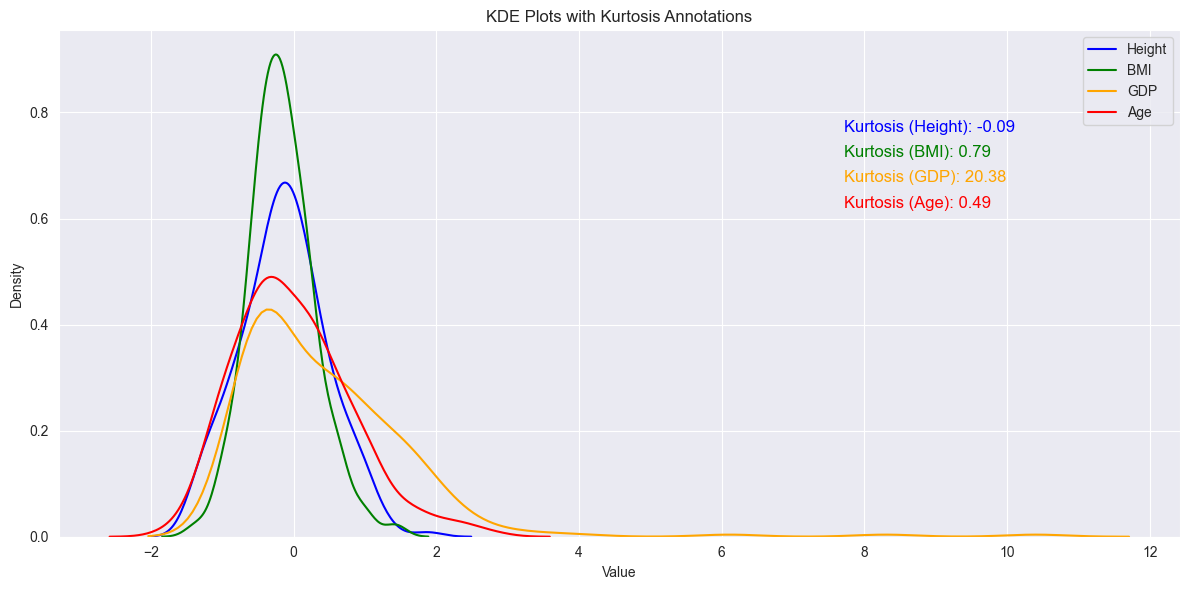

In [42]:
kurt_height_kayak = kurtosis(kayak['Height'].squeeze())
kurt_bmi_kayak = kurtosis(kayak['BMI'].squeeze())
kurt_gdp_kayak = kurtosis(kayak['GDP'].squeeze())
kurt_age_kayak = kurtosis(kayak['Age'].squeeze())

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot KDE for each variable
sns.kdeplot(data=kayak['Height'].squeeze(), ax=ax, label='Height', color='blue')
sns.kdeplot(data=kayak['BMI'].squeeze(), ax=ax, label='BMI', color='green')
sns.kdeplot(data=kayak['GDP'].squeeze(), ax=ax, label='GDP', color='orange')
sns.kdeplot(data=kayak['Age'].squeeze(), ax=ax, label='Age', color='red')

# Add kurtosis annotations
ax.annotate(f'Kurtosis (Height): {kurt_height_kayak:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
ax.annotate(f'Kurtosis (BMI): {kurt_bmi_kayak:.2f}', xy=(0.7, 0.75), xycoords='axes fraction', fontsize=12, color='green')
ax.annotate(f'Kurtosis (GDP): {kurt_gdp_kayak:.2f}', xy=(0.7, 0.70), xycoords='axes fraction', fontsize=12, color='orange')
ax.annotate(f'Kurtosis (Age): {kurt_age_kayak:.2f}', xy=(0.7, 0.65), xycoords='axes fraction', fontsize=12, color='red')

# Add legend and show plot
plt.legend()
plt.title('KDE Plots with Kurtosis Annotations')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [46]:
kayak.sort_values(by='GDP', ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
15833,14017,Benjamin Kudjow Thomas Boukpeti,M,0.234571,-0.317350,73.0,Togo,MCO,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, Slalom",Bronze,True,0.024459,10.405501
15834,14017,Benjamin Kudjow Thomas Boukpeti,M,0.779451,-0.317350,73.0,Togo,MCO,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.024459,8.297022
15832,14017,Benjamin Kudjow Thomas Boukpeti,M,-0.491935,-0.317350,73.0,Togo,MCO,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.024459,6.108727
74924,65189,"Michael ""Mike"" Kurt",M,1.142704,0.282310,80.0,Switzerland,CHE,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.226011,3.945642
74923,65189,"Michael ""Mike"" Kurt",M,0.416198,0.282310,80.0,Switzerland,CHE,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.226011,3.308673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87876,76334,Dubravko Matakovi,M,0.779451,-0.417293,77.0,Yugoslavia,OMN,1972 Summer,1972,Summer,Munich,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.567484,-0.714753
131345,113702,Milan Spasovski,M,-0.855188,-0.117463,70.0,Yugoslavia,OMN,1972 Summer,1972,Summer,Munich,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,-0.483164,-0.714753
96028,83012,Dinko Muli,M,-1.036814,1.081856,87.0,Croatia,RWA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.208114,-0.728292
47003,40825,Andrej Glucks,M,-0.310308,-1.316783,70.0,Croatia,RWA,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Singles, Slalom",No Medal,False,0.657043,-0.729123
